## Run simulation and optimizations for the Single-Stage OTA Biased by Voltage-Combiners example


In [1]:
import json
import circuits as cir
import pandas as pd
import logging
from datetime import datetime

log_file = '../ss_vc.log'
with open(log_file, "w") as f:
    f.write(str(datetime.now().time()))

logging.basicConfig(filename=log_file, level=logging.DEBUG)


In [2]:
# PTM 130
#load the cicruit definitions and targets defined in circuit_setup.json
ss_vc = cir.Circuit("../circuit_examples/ss_vc_ota/ptm130/", corners=None)

#load a sample sizing
with open("../circuit_examples/ss_vc_ota/ptm130/sizing_example.json", 'r') as file:
    sizing = json.load(file)

simulation_result = ss_vc.simulate(sizing)


print("SS_VC PTM 130 TT Simulation Results")

df = pd.DataFrame(simulation_result[0]).transpose()

df['CL'] *= 1e12  
df.rename(columns = {"CL": "CL[pF]"}, inplace=True)  
print(df)


SS_VC PTM 130 TT Simulation Results
    AC CL[pF] DELTA_MNM10 DELTA_MNM11 DELTA_MNM4 DELTA_MNM5 DELTA_MNM6  \
TT  []      6     1.41486      2.0931   0.527075   0.527073     2.0931   

   DELTA_MNM7 DELTA_MNM8 DELTA_MNM9  ...   VOV_MNM4   VOV_MNM5   VOV_MNM6  \
TT     2.0931    0.31544   0.315441  ...  0.0290203  0.0290204  0.0290698   

     VOV_MNM7 VOV_MNM8 VOV_MNM9 VOV_MPM0 VOV_MPM1 VOV_MPM2 VOV_MPM3  
TT  0.0290698  1.15519  1.15519  1.11933  1.11932  1.11932  1.11933  

[1 rows x 36 columns]


In [3]:
#load the cicruit definitions and targets defined in circuit_setup.json with corners from corners.inc
ss_vc_corners = cir.Circuit("../circuit_examples/ss_vc_ota/ptm130/")

simulation_result_corners = ss_vc_corners.simulate(sizing)


print("Simulation Results All Corners")
df = pd.DataFrame(simulation_result_corners[0]).transpose()

# rescale CL to show not 0 in df
#df['CL'] *= 1e12
#df.rename(columns = {"CL": "CL[pF]"}, inplace=True)  
print(df)

Simulation Results All Corners
              IDD     CL  VOV_MPM0 DELTA_MPM0  VOV_MPM1 DELTA_MPM1  VOV_MPM2  \
TT    0.000847367  6e-12   1.11933   0.442518   1.11932   0.645966   1.11932   
SS    0.000756535  6e-12    1.1155   0.494664    1.1155    0.68146    1.1155   
SNFP  0.000761695  6e-12  0.959731   0.596332  0.959722   0.571689  0.959723   
FF    0.000955952  6e-12   1.12032   0.389962   1.12032   0.606352   1.12032   
FNSP  0.000946844  6e-12   1.30442   0.273037   1.30442   0.726431   1.30443   

     DELTA_MPM2  VOV_MPM3 DELTA_MPM3  ...  AC INOISE_TOTAL ONOISE_TOTAL  \
TT     0.645966   1.11933   0.442482  ...  []     0.001218    0.0150095   
SS      0.68146    1.1155   0.494635  ...  []   0.00127672    0.0154064   
SNFP   0.571689  0.959732   0.596303  ...  []   0.00127767    0.0159348   
FF     0.606352   1.12032    0.38992  ...  []   0.00116697    0.0144139   
FNSP   0.726431   1.30442      0.273  ...  []   0.00117332    0.0128915   

          GDC      FC          GBW   

In [4]:
obj,cstr,log = ss_vc.target.evaluate(simulation_result[0])

print("Objectives TT")

print( {ss_vc.objectives[i][0]:(obj[i]*ss_vc.objectives[i][1]) for i in range(len(obj))})

print("Constraints TT")
print(cstr)
print(log)

obj,cstr,log = ss_vc_corners.target.evaluate(simulation_result_corners[0])

print("Objectives WC corners")

print( {ss_vc_corners.objectives[i][0]:(obj[i]*ss_vc_corners.objectives[i][1]) for i in range(len(obj))})


Objectives TT
{'IDD': 0.0008473673, 'GBW': 79432820.0, 'GDC': 56.32067}
Constraints TT
-3.7861062507936514
{'TT': {'IDD_lt': (0.00035, 0.0008473673, -1.4210494285714286), 'PM_gt': (45.0, 32.84729, -0.2700602222222222), 'VOV_MNM4_gt': (0.05, 0.0290203, -0.4195940000000001), 'VOV_MNM5_gt': (0.05, 0.02902038, -0.4195924000000001), 'VOV_MNM6_gt': (0.05, 0.02906981, -0.4186038), 'VOV_MNM7_gt': (0.05, 0.02906984, -0.41860320000000006), 'VOV_MNM11_gt': (0.05, 0.02906984, -0.41860320000000006)}}
Objectives WC corners
{'IDD': 0.0009559517, 'GBW': 70794580.0, 'GDC': 54.72508}


## Optimizing in Nominal conditions

Outputs are save to the output_folder

This can take a while.


In [5]:
cir.run_optimization("../circuit_examples/ss_vc_ota/ptm130/", "../run/ptm130_ss_vc/",
    pop_size=50, iterations=50, stop_on_feas=True)

Starting optimization 18:39:01.743328
 27 [0.] ({'TT': {'IDD': 0.0001942441, 'CL': 6e-12, 'VOV_MPM0': 0.1125095, 'DELTA_MPM0': 1.556111, 'VOV_MPM1': 0.1102408, 'DELTA_MPM1': 0.4249829, 'VOV_MPM2': 0.1103411, 'DELTA_MPM2': 0.425014, 'VOV_MPM3': 0.1125895, 'DELTA_MPM3': 1.542293, 'VOV_MNM4': 0.1255607, 'DELTA_MNM4': 1.576789, 'VOV_MNM5': 0.1256753, 'DELTA_MNM5': 1.576727, 'VOV_MNM6': 0.1256744, 'DELTA_MNM6': 2.133863, 'VOV_MNM7': 0.1255598, 'DELTA_MNM7': 2.133824, 'VOV_MNM8': 1.155238, 'DELTA_MNM8': 0.1523381, 'VOV_MNM9': 1.155259, 'DELTA_MNM9': 0.1524381, 'VOV_MNM10': 0.194206, 'DELTA_MNM10': 1.423023, 'VOV_MNM11': 0.1255598, 'DELTA_MNM11': 2.133824, 'AC': [], 'INOISE_TOTAL': 6.819782e-05, 'ONOISE_TOTAL': 0.00465413, 'GDC': 53.63325, 'FC': 158489.3, 'GBW': 281838300.0, 'PM': 88.5261, 'SDINOISE': 7.551108e-10, 'SDONOISE': 8.947327e-10, 'FOM': 8705.694535895813}}, {'TT': {}}) 18:41:01.520182 (90.0, 91.5766, -0.017517777777777768)}}) 18:40:58.36234733804, -0.013239200000000012)}}) 18:40:47

/home/nlourenco/open-analog-ics/BAIcO/src/plot_utils.py:76: UserWarning: Attempting to set identical left == right == 194.2441 results in singular transformations; automatically expanding.
  ax[p].axis([xmin, xmax, ymin, ymax])
/home/nlourenco/open-analog-ics/BAIcO/src/plot_utils.py:76: UserWarning: Attempting to set identical bottom == top == 281.8383 results in singular transformations; automatically expanding.
  ax[p].axis([xmin, xmax, ymin, ymax])
/home/nlourenco/open-analog-ics/BAIcO/src/plot_utils.py:76: UserWarning: Attempting to set identical bottom == top == 53.63325 results in singular transformations; automatically expanding.
  ax[p].axis([xmin, xmax, ymin, ymax])


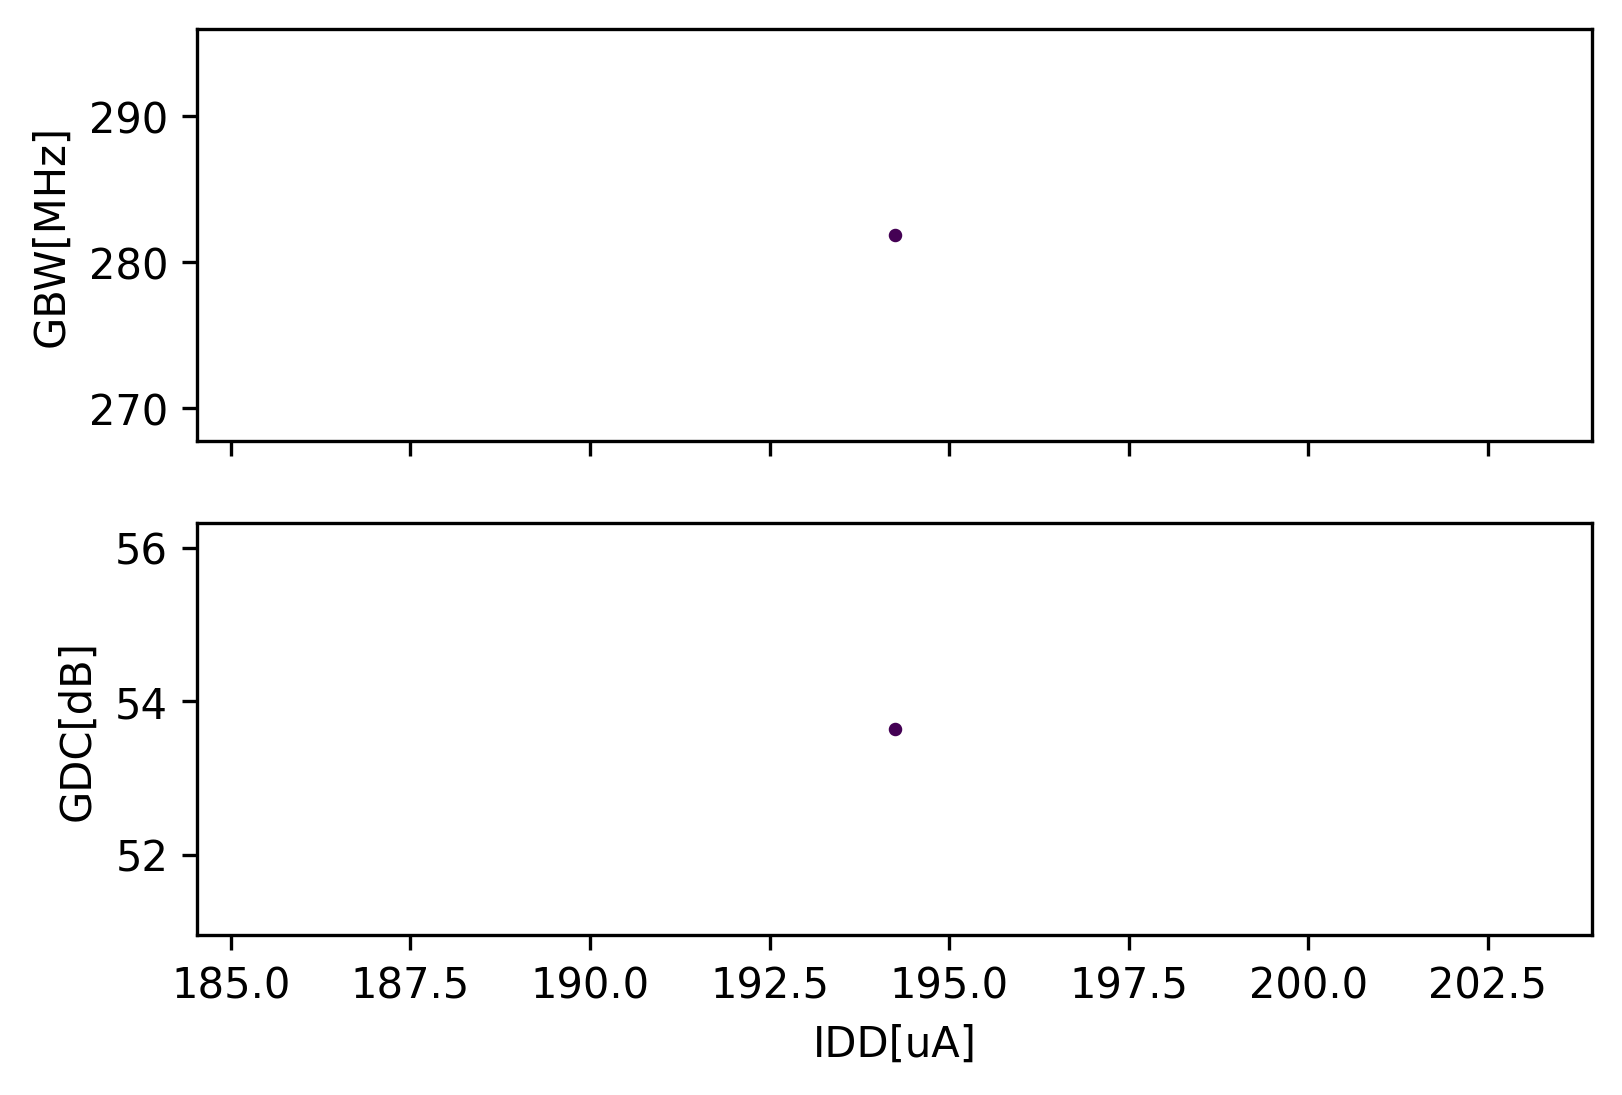

In [8]:
import plot_utils 
plot_utils.plt_pof(["/home/nlourenco/open-analog-ics/BAIcO/run/ptm130_ss_vc/history_50_42_27.json"], scales = [("[uA]", 1e6),("[MHz]", 1e-6),("[dB]", 1.0)])

In [7]:
#SKY 130
# load the cicruit definitions and targets defined in circuit_setup.json
ss_vc = cir.Circuit("../circuit_examples/ss_vc_ota/sky130/", corners=None)

#load a sample sizing
with open("../circuit_examples/ss_vc_ota/sky130/sizing_example.json", 'r') as file:
    sizing = json.load(file)

simulation_result = ss_vc.simulate(sizing)


print("SS_VC SKY 130 TT Simulation Results")

df = pd.DataFrame(simulation_result[0]).transpose()

df['CL'] *= 1e12  
df.rename(columns = {"CL": "CL[pF]"}, inplace=True)  
print(df)


KeyboardInterrupt: 

In [ ]:
#load the cicruit definitions and targets defined in circuit_setup.json with corners from corners.inc
ss_vc_corners = cir.Circuit("../circuit_examples/ss_vc_ota/sky130/")

simulation_result_corners = ss_vc_corners.simulate(sizing)


print("Simulation Results All Corners")
df = pd.DataFrame(simulation_result_corners[0]).transpose()

# rescale CL to show not 0 in df
#df['CL'] *= 1e12
#df.rename(columns = {"CL": "CL[pF]"}, inplace=True)  
print(df)

In [ ]:
obj,cstr,log = ss_vc.target.evaluate(simulation_result[0])

print("Objectives TT")

print( {ss_vc.objectives[i][0]:(obj[i]*ss_vc.objectives[i][1]) for i in range(len(obj))})

print("Constraints TT")
print(cstr)
print(log)

obj,cstr,log = ss_vc_corners.target.evaluate(simulation_result_corners[0])

print("Objectives WC corners")

print( {ss_vc_corners.objectives[i][0]:(obj[i]*ss_vc_corners.objectives[i][1]) for i in range(len(obj))})

In [ ]:
cir.run_optimization("../circuit_examples/ss_vc_ota/sky130/", "../run/sky130_ss_vc/",
    pop_size=256, iterations=50)